# Support Vector Machines

A **Support Vector Machine** (SVM) is a powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection. SVMs are particularly well suited for classification of complex small-medium-sized datasets.

1. [Linear SVM Classification](#Linear-SVM-Classification)
2. [Nonlinear SVM Classification](#Nonlinear-SVM-Classification)
3. [SVM Regression](#SVM-Regression)
4. [Exercise](#Exercise)

In [96]:
import sklearn
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Linear SVM Classification

The linear SVM classifier model predicts the class of a new instance $x$ by simply computing the decision function 

$w^T \dot x + b = w_1 x_1 + w_2 x_2 + ⋯ + w_n x_n + b$

If the result is positive, the predicted class $\hat{y}$ is the positive class, and otherwise it is the negative class (0);

$\hat{y} = 
\begin{cases}
    0 & \text{if} & w^T \dot x + b \lt 0 \\
    1 & \text{if} & w^T \dot x + b \gt 1
\end{cases}$


This idea behind SVMs can be explained with a picture. The next figure shows part of the iris dataset. The two classes can clearly be separated easily with a straight line (they are **linearly separable**).

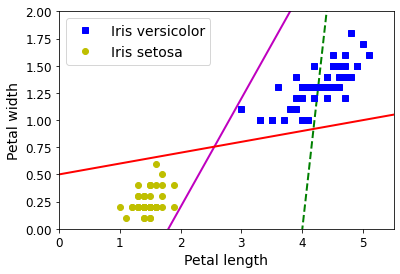

In [97]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

The plot shows the decision boundaries of three possible linear classifiers. The model whose decision boundary is represented by the dashed line is so bad that it does not even separate the classes properly. The other two models work perfectly on this training set, but their decision boundaries come so close to the instances that these models will probably not perform as well on newinstances. 

SMV finds the line than not only separates the two classes but also stays as far away from the closest training instances as possible. 

This is called **large margin classification**.

(0.0, 5.5, 0.0, 2.0)

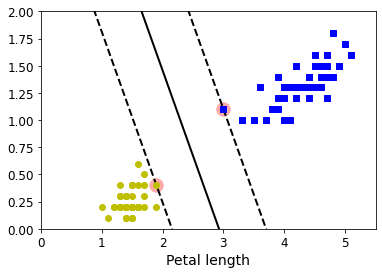

In [98]:
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

def plot_svm_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    x = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x, decision_boundary, "k-", linewidth=2)
    plt.plot(x, gutter_up, "k--", linewidth=2)
    plt.plot(x, gutter_down, "k--", linewidth=2)

plot_svm_decision_boundary(svm_clf, 0, 5.5)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)

plt.axis([0, 5.5, 0, 2])

Notice that adding more training instances “off the street” will not affect the decision boundary at all: it is fully determined (or supported) by the instances located on the edge of the street, called the **support vectors** (circled).

If we strictly impose that all instances must be "off the street" and on the right side, this is called **hard margin classification**. There are two main issues with this approach: first, it only works if the data is linearly separable; second, it is sensitive to outliers.

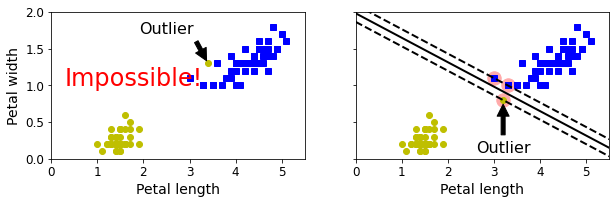

In [99]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf = SVC(kernel="linear", C=10**9)
svm_clf.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svm_decision_boundary(svm_clf, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16)

plt.axis([0, 5.5, 0, 2])

plt.show()

If we add just one additional outlier: on the left, it is impossible
to find a hard margin; on the right, the decision boundary ends up very different from the
one we saw in Figure 5-1 without the outlier, and it will probably not generalize as well.

To avoid these issues, we can use a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (instances that end up in the middle of the street or even on the wrong side). This is called **soft margin classification**.

When creating an SVM model using Scikit-Learn, we can specify the C hyperparameters in order to decide this balance.

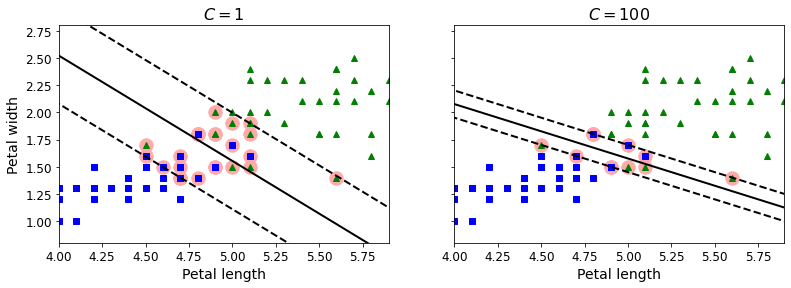

In [100]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # iris virginica

svm_clf1 = SVC(kernel="linear", C=1)
svm_clf1.fit(X, y)
svm_clf2 = SVC(kernel="linear", C=100)
svm_clf2.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(13,4), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svm_decision_boundary(svm_clf1, 0, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svm_decision_boundary(svm_clf2, 0, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.show()

Margin violations are bad. It’s usually better to have few of them. However, in this case, the model on the left, that has a lot of margin violations, will probably generalize better. If your SVM model is overfitting, you can try regularizing it by reducing C.

## Nonlinear SVM Classification
Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not linearly separable. 

### Polynomial Kernel

One approach to handling nonlinear datasets is to add more features, such as polynomial features, in some cases this can result in a linearly separable dataset.

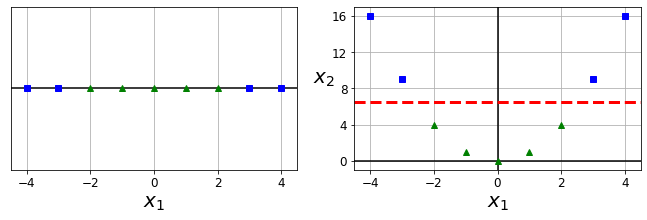

In [101]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

Consider the left plot, it represents a simple dataset with just one feature $x_1$. This dataset is not linearly separable, but if we add a second feature $x_2 = x_1^2$ , the resulting 2D dataset is perfectly linearly separable.

To implement this idea using Scikit-Learn, we can create a Pipeline containing a PolynomialFeatures transformer, followed by a StandardScaler and a linear SVM. Let’s test this on the **moons dataset** (a toy dataset
for binary classification in which the data points are shaped as two interleaving half circles).

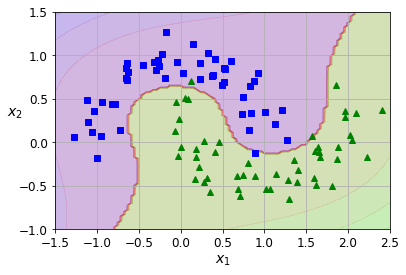

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([("poly_features", PolynomialFeatures(degree=3)),
                               ("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel="linear", C=10, random_state=42))])
polynomial_svm_clf.fit(X, y)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
    
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs). That said, at a low polynomial degree, this method cannot deal with very complex datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow.

When using SVMs we can apply a mathematical technique called the **kernel trick**, which makes it possible to get the same result as if you had added many polynomial features, even with very high-degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features because we don’t actually add any features. This trick is implemented by the SVC class.

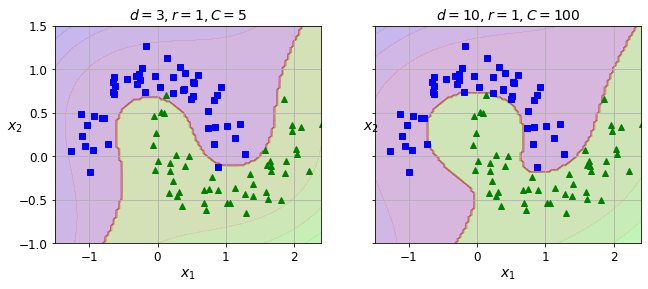

In [103]:
from sklearn.svm import SVC

poly_kernel_svm_clf_1 = Pipeline([("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))])
poly_kernel_svm_clf_1.fit(X, y)


poly_kernel_svm_clf_2 = Pipeline([("scaler", StandardScaler()), 
                                  ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))])
poly_kernel_svm_clf_2.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf_1, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=14)

plt.sca(axes[1])
plot_predictions(poly_kernel_svm_clf_2, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=1, C=100$", fontsize=14)

plt.show()

This code trains two SVM classifiers using polynomial kernels 3th-degree and 10th-degree). If the model is overfitting, we can reduce the polynomial degree, conversely, if it is underfitting, we can try increasing it.

### Gaussian RBF Kernel
Another technique to tackle nonlinear problems is to add features computed using a similarity function, which measures how much each instance resembles a particular landmark. 

For example, let’s take the 1D dataset discussed earlier and add two landmarks to
it at $x_1=–2$ and $x_1=1$ and let’s define the similarity function to be the **Gaussian Radial Basis Function (RBF)** with $\gamma=0.3$, which is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark).

$\phi_\gamma(x,l)=exp(-\gamma \left\|x-l\right\|^2$) 

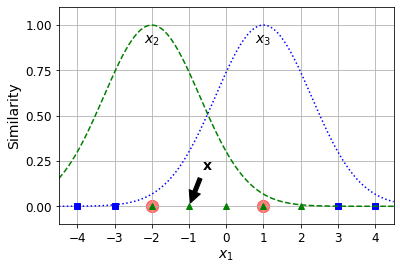

In [104]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

plt.grid(True, which='both')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=14,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=14)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=14)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.show()

Let’s look at the instance $x_1=–1$: it is located at a distance of 1 from the first landmark and 2 from the second landmark. Therefore its new features are $x_1=exp(–0.3 \times 1^2)≈ 0.74$ and $x_3=exp(–0.3 \times 2^2)≈0.30$. 

Then we can plot the transformed dataset (dropping the original features), which i now linearly separable.

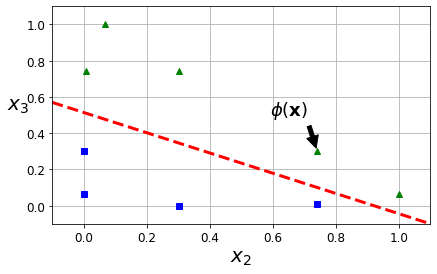

In [105]:
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.grid(True, which='both')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

How to select the landmarks? The simplest approach is to create a landmark at the location of each instance in the dataset. Doing that creates many dimensions and increases the chances that the transformed training set will be linearly separable. The downside is that we get a large number of features.

Just like the polynomial features method, the similarity features method can be useful with
any Machine Learning algorithm, but it may be computationally expensive. Once again the kernel trick makes it possible to obtain a similar result.

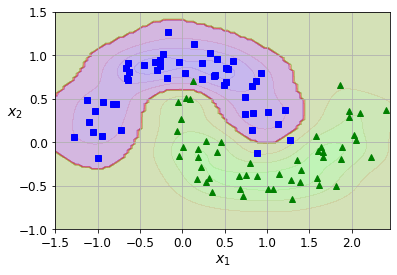

In [106]:
rbf_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))])
rbf_kernel_svm_clf.fit(X, y)

plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])

plt.show()

We can modify the hyperparameters $\gamma$ to obtain differnt resutls.  Increasing $\gamma$ makes the bell-shaped curve narrower, so each instance’s range of influence is smaller and the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small $\gamma$ value makes the bellshaped curve wider, instances have a larger range of influence, and the decision boundary ends up smoother. So it acts like a regularization hyperparameter. If a model is overfitting, we should reduce it; if it is underfitting, we should increase it (similar to the C hyperparameter).

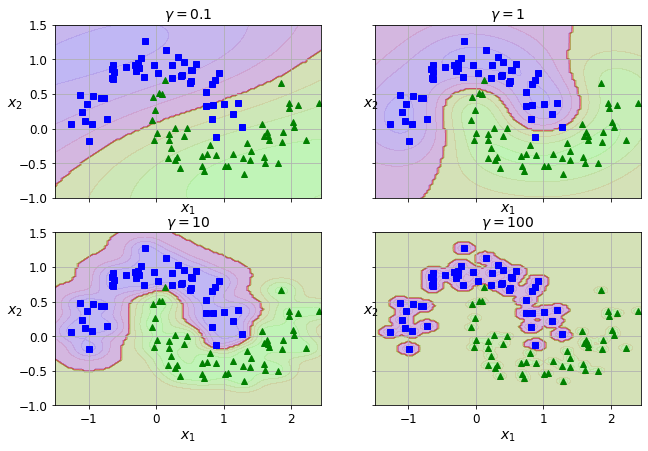

In [107]:
hyperparams = 0.1, 1, 10, 100
svm_clfs = []
for gamma in hyperparams:
    rbf_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                                   ("svm_clf", SVC(kernel="rbf", gamma=gamma))])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma = hyperparams[i]
    plt.title(r"$\gamma = {}$".format(gamma), fontsize=14)

plt.show()

Other kernels exist but are used much more rarely. Some kernels are specialized for specific
data structures. String kernels are sometimes used when classifying text documents or DNA
sequences (e.g., using the string subsequence kernel or kernels based on the **Levenshtein
distance**).

With so many kernels to choose from, how can you decide which one to use? As a rule of thumb, we should always try the linear kernel first, especially if the training set is very large or if it has plenty of features. If the training set is not too large, we should also try the Gaussian RBF kernel; it works well in most cases. Then if we have spare time and computing power, we can experiment with a few other kernels, using cross-validation and grid search. 

### Computational Complexity
Instead of using the calls SVC, we can use LinearSVC in case of linear SVM, which is much faster. 

The LinearSVC class is based on the **liblinear library**, which implements an optimized algorithm for linear SVMs, but it does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features. Its training time complexity is roughly $O(m \times n)$. The algorithm takes longer if you require very high precision. This is controlled by the tolerance hyperparameter $\epsilon$ (called tol in Scikit-Learn).

The SVC class is based on the **libsvm library**, which implements an algorithm that supports
the kernel trick. The training time complexity is usually between $O(m^2 \times n)$ and $O(m^3 \times n)$. Unfortunately, this means that it gets dreadfully slow when the number of training instances gets large. This algorithm is perfect for complex small or medium-sized training sets. It scales well with the number of features.

## SVM Regression
The SVM algorithm is versatile: not only does it support linear and nonlinear classification, but it also supports linear and nonlinear regression. To use SVMs for regression, the trick is to reverse the objective: instead of trying to fit the largest possible "street" between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the "street" while limiting margin violations (i.e., instances off the street). The width of the street is controlled by a hyperparameter $\epsilon$. We can use Scikit-Learn’s **LinearSVR class** to perform linear SVM Regression.

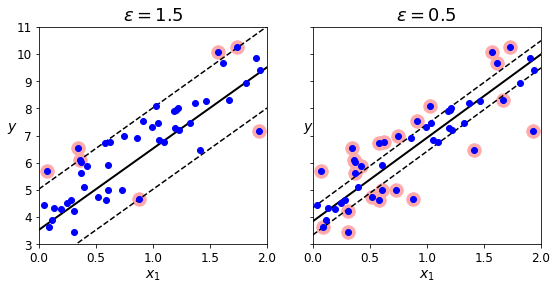

In [114]:
from sklearn.svm import LinearSVR

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support], y[svm_reg.support], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.axis(axes)

svm_reg_1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg_1.fit(X, y)
svm_reg_1.support = find_support_vectors(svm_reg_1, X, y)

svm_reg_2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg_2.fit(X, y)
svm_reg_2.support = find_support_vectors(svm_reg_2, X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_reg_1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg_1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=14, rotation=0)

plt.sca(axes[1])
plot_svm_regression(svm_reg_2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg_2.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=14, rotation=0)

plt.show()

The previous figure shows two linear SVM Regression models trained on some random linear data, one with a large margin ($\epsilon=1.5$) and the other with a small margin ($\epsilon=0.5$). Adding more training instances within the margin does not affect the model’s predictions; thus, the model is said to be $\epsilon$-insensitive.

To tackle nonlinear regression tasks, we can use a kernelized SVM model, using the **SVR class** of SciKitLearn, which is the regression equivalent of the SVC class, and the LinearSVR class is the regression equivalent of the LinearSVC class. The LinearSVR class scales linearly with the size of the training set (just like the LinearSVC class), while the SVR class gets much too slow when the training set grows large (just like the SVC class).

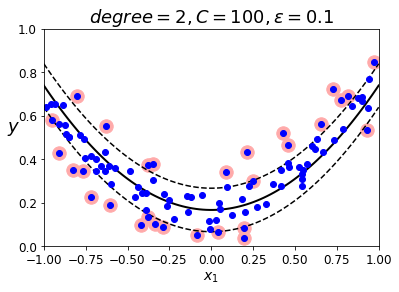

In [118]:
from sklearn.svm import SVR

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)
svm_poly_reg.support = find_support_vectors(svm_poly_reg1, X, y)

plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg.degree, svm_poly_reg.C, svm_poly_reg.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.show()

## Exercise

**1 - Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly
the same model**

Let's use the Iris dataset: the Iris Setosa and Iris Versicolor classes are linearly separable.

In [44]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [45]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28474532] [[1.05364923 1.09903601]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77666262 0.72787608]]


Let's plot the decision boundaries of these three models:

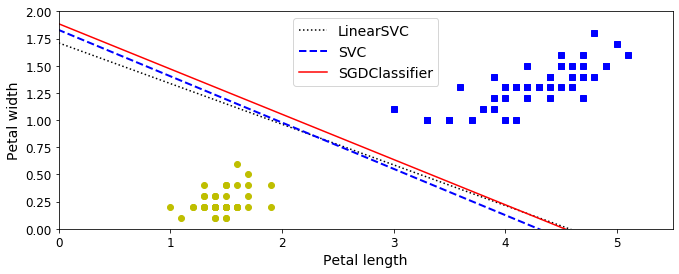

In [46]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

Close enough!

**2 - Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?**

First, let's load the dataset and split it into a training set and a test set. We could use `train_test_split()` but people usually just take the first 60,000 instances for the training set, and the last 10,000 instances for the test set (this makes it possible to compare your model's performance with others): 

In [47]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

Many training algorithms are sensitive to the order of the training instances, so it's generally good practice to shuffle them first. However, the dataset is already shuffled, so we do not need to do it.

Let's start simple, with a linear SVM classifier. It will automatically use the One-vs-All (also called One-vs-the-Rest, OvR) strategy, so there's nothing special we need to do. Easy!

**Warning**: this may take a few minutes depending on your hardware.

In [48]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

/Users/ageron/miniconda3/envs/tf2b/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

Let's make predictions on the training set and measure the accuracy (we don't want to measure it on the test set yet, since we have not selected and trained the final model yet):

In [49]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.895

Okay, 89.5% accuracy on MNIST is pretty bad. This linear model is certainly too simple for MNIST, but perhaps we just needed to scale the data first:

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

**Warning**: this may take a few minutes depending on your hardware.

In [51]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

/Users/ageron/miniconda3/envs/tf2b/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [52]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.92105

That's much better (we cut the error rate by about 25%), but still not great at all for MNIST. If we want to use an SVM, we will have to use a kernel. Let's try an `SVC` with an RBF kernel (the default).

**Note**: to be future-proof we set `gamma="scale"` since it will be the default value in Scikit-Learn 0.22.

In [53]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

That's promising, we get better performance even though we trained the model on 6 times less data. Let's tune the hyperparameters by doing a randomized search with cross validation. We will do this on a small dataset just to speed up the process:

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.205364371116072, gamma=0.0020363543195523162 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . C=4.205364371116072, gamma=0.0020363543195523162, total=   0.6s
[CV] C=4.205364371116072, gamma=0.0020363543195523162 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] . C=4.205364371116072, gamma=0.0020363543195523162, total=   0.6s
[CV] C=4.205364371116072, gamma=0.0020363543195523162 ................
[CV] . C=4.205364371116072, gamma=0.0020363543195523162, total=   0.6s
[CV] C=7.988626913672013, gamma=0.0017374050727190405 ................
[CV] . C=7.988626913672013, gamma=0.0017374050727190405, total=   0.6s
[CV] C=7.988626913672013, gamma=0.0017374050727190405 ................
[CV] . C=7.988626913672013, gamma=0.0017374050727190405, total=   0.6s
[CV] C=7.988626913672013, gamma=0.0017374050727190405 ................
[CV] . C=7.988626913672013, gamma=0.0017374050727190405, total=   0.6s
[CV] C=5.85175909599865, gamma=0.01842788363564703 ...................
[CV] .... C=5.85175909599865, gamma=0.01842788363564703, total=   0.7s
[CV] C=5.85175909599865, gamma=0.01842788363564703 ...................
[CV] .... C=5.85175909599865, gamma=0.01842788363564703, total=   0.7s
[CV] C=5.85175909599865, gamma=0.01842788363564703 ...................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   28.9s finished
/Users/ageron/miniconda3/envs/tf2b/lib/python3.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9850502d90>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f98b046a550>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [56]:
rnd_search_cv.best_estimator_

SVC(C=7.988626913672013, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0017374050727190405,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [57]:
rnd_search_cv.best_score_

0.86

This looks pretty low but remember we only trained the model on 1,000 instances. Let's retrain the best estimator on the whole training set (run this at night, it will take hours):

In [58]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=7.988626913672013, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0017374050727190405,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [59]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9995

Ah, this looks good! Let's select this model. Now we can test it on the test set:

In [60]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9713

Not too bad, but apparently the model is overfitting slightly. It's tempting to tweak the hyperparameters a bit more (e.g. decreasing `C` and/or `gamma`), but we would run the risk of overfitting the test set. Other people have found that the hyperparameters `C=5` and `gamma=0.005` yield even better performance (over 98% accuracy). By running the randomized search for longer and on a larger part of the training set, you may be able to find this as well.

**3 - Train an SVM regressor on the California housing dataset**

Let's load the dataset using Scikit-Learn's `fetch_california_housing()` function:

In [61]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

Split it into a training set and a test set:

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Don't forget to scale the data:

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's train a simple `LinearSVR` first:

In [64]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

/Users/ageron/miniconda3/envs/tf2b/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

Let's see how it performs on the training set:

In [65]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.954517044073374

Let's look at the RMSE:

In [66]:
np.sqrt(mse)

0.976993881287582

In this training set, the targets are tens of thousands of dollars. The RMSE gives a rough idea of the kind of error you should expect (with a higher weight for large errors): so with this model we can expect errors somewhere around $10,000. Not great. Let's see if we can do better with an RBF Kernel. We will use randomized search with cross validation to find the appropriate hyperparameter values for `C` and `gamma`:

In [67]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   5.4s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   5.5s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   5.5s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   5.3s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   5.2s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   5.1s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   4.6s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   4.6s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12fc2e390>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12fc2eac8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [68]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.07969454818643928, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

Now let's measure the RMSE on the training set:

In [69]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785359

Looks much better than the linear model. Let's select this model and evaluate it on the test set:

In [70]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.5929168385528734